In [42]:

import sys


sys.path.append('../../') #server per fare l'import di file in un'altra directory sullo stesso "livello"
from src.function import SoftplusFunction
from src.NeuralNetwork import Layer, NeuralNetwork
from src.function import IdentityFunction, ReLuFunction
from matplotlib import pyplot as plt
from src.load_ds import load_matrix
from src.error import MeanSquaredError, MeanEuclidianError, MeanAbsoluteError
from src.training.crossvalidation import grid_search
# from src.training.multiprocessing_crossvalidation import grid_search

In [43]:
target_inputs, target_outputs = load_matrix('../../datasets/CUP/model_selection')

In [44]:
layer1 = Layer(num_neurons = 4, num_inputs = 9, activation_function = SoftplusFunction())
layer2 = Layer(num_neurons = 2, num_inputs = 4, activation_function = IdentityFunction())
neuralNetwork1 = NeuralNetwork([layer1, layer2], error=MeanEuclidianError())

layer1 = Layer(num_neurons = 4, num_inputs = 9, activation_function = ReLuFunction())
layer2 = Layer(num_neurons = 2, num_inputs = 4, activation_function = IdentityFunction())
neuralNetwork2 = NeuralNetwork([layer1, layer2], error=MeanEuclidianError())

parameters_grid_example = {
        'model': [neuralNetwork1], #
        'learning_rate': [0.00001],
        'momentum_term': [0.5],
        'regularization_term': [0.01],
        'epochs': [50]
    }

In [45]:
dict = grid_search(parameters_grid=parameters_grid_example, target_inputs=target_inputs, target_outputs=target_outputs, k=5)

Fold  0
Fold  1
Fold  2
Fold  3
Fold  4
Process 39081 started
Process 39086 started
Process 39091 started
Process 39096 started
Process 39101 started
Process 39040 started
fatto training
fatto training
Process  39081  terminated
fatto training
fatto training
Process  39086  terminated
Process  39091  terminated
fatto training
Process  39096  terminated
Process  39101  terminated
Process  39040  terminated


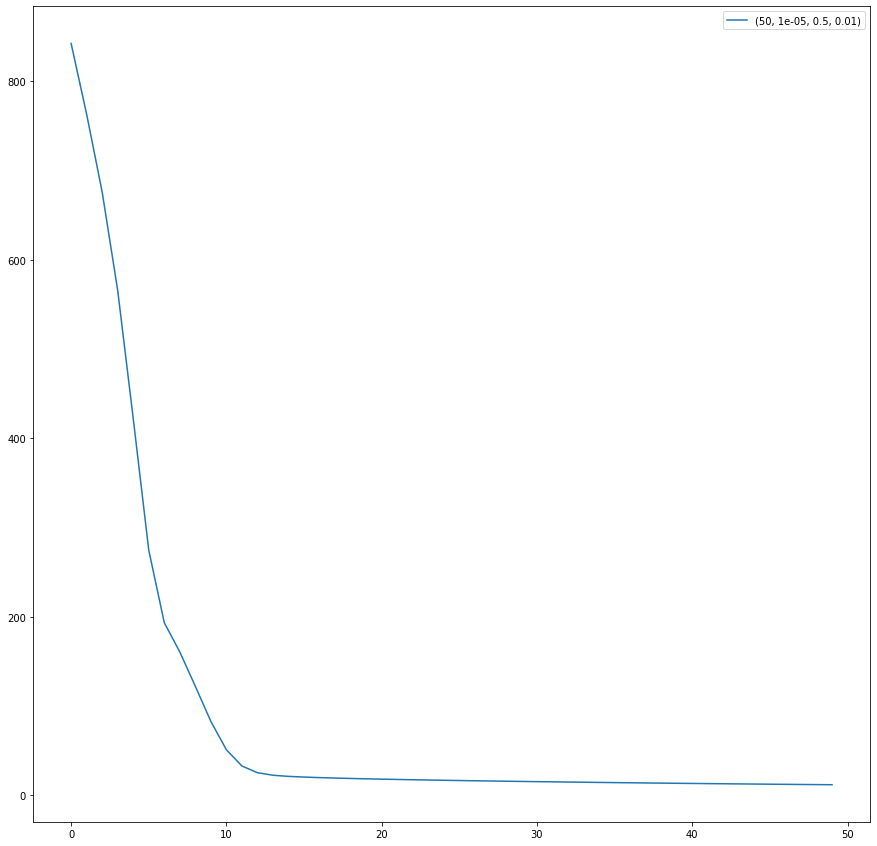

In [46]:
training_error_history_list = dict["training_error_history_list"]
validation_error_history_list = dict["validation_error_history_list"]
parameters_list = dict["parameters_list"]

plt.figure(figsize=(15,15))

for validation_error_history, parameters in zip(validation_error_history_list, parameters_list):
    plt.plot(validation_error_history, label=f"{parameters}")

plt.legend()